# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re
import math
import warnings
import pickle
warnings.filterwarnings("ignore")

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("1 - Отвечаем на вопрос о значении жизни, вселенной и всего остального")
print("2 - Фиксируем рандом в процессах для воиспроизводимости результатов")

1 - Отвечаем на вопрос о значении жизни, вселенной и всего остального
2 - Фиксируем рандом в процессах для воиспроизводимости результатов


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

df_train_cp = df_train.copy()
df_test_cp = df_test.copy()

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [4]:
# Для загрузки csv на сервер
df_test.head(20).to_csv('df_car_price_test.csv', sep=';', index=False)
#pd.read_csv('df_car_price_test.csv', sep=';', )

(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [5]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [6]:
display(df_train.head())

df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)

In [7]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [8]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [9]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [10]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [11]:
dupl_data = df_train.drop('selling_price', axis=1).copy()

# Для каждой строчки подсчитаем кол-во вхождений
dupl_data = pd.DataFrame(dupl_data.groupby(list(dupl_data.columns))['name'].count())

# Причешим табличку
dupl_data = dupl_data.rename(columns={'name':'cnt_row'}).reset_index()

# Оставим дублирубщиеся строчки
dupl_data = dupl_data[dupl_data['cnt_row']>1]

p = len(dupl_data)

print(f'Итого {p} машины с одинаковым признаковым описанием')

Итого 624 машины с одинаковым признаковым описанием


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [12]:
# cnt_row - кол-во вхождений для каждой машины в нашу выборку
dupl_data

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,cnt_row
21,Audi Q3 2.0 TDI Quattro Premium Plus,2017,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0,2
25,Audi Q5 3.0 TDI Quattro,2014,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0,2
26,Audi Q5 35TDI Premium Plus,2018,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0,6
39,BMW 3 Series 320d Luxury Line,2012,140000,Diesel,Individual,Automatic,Second Owner,18.88 kmpl,1995 CC,184 bhp,380Nm@ 1750-2750rpm,5.0,2
41,BMW 3 Series 320d Luxury Line Plus,2017,44000,Diesel,Dealer,Automatic,First Owner,22.69 kmpl,1995 CC,190 bhp,400Nm@ 1750-2750rpm,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5558,Volkswagen Polo 2015-2019 1.5 TDI Highline Plus,2018,40000,Diesel,Dealer,Manual,First Owner,20.14 kmpl,1498 CC,88 bhp,230Nm@ 1500-2500rpm,5.0,2
5606,Volkswagen Vento 1.5 TDI Highline AT,2016,60000,Diesel,Individual,Automatic,First Owner,22.15 kmpl,1498 CC,108.6 bhp,250Nm@ 1500-3000rpm,5.0,2
5627,Volkswagen Vento Diesel Highline,2012,90000,Diesel,Individual,Manual,First Owner,20.54 kmpl,1598 CC,103.6 bhp,250Nm@ 1500-2500rpm,5.0,3
5649,Volvo V40 D3 R-Design,2018,2000,Diesel,Dealer,Automatic,First Owner,16.8 kmpl,1984 CC,150 bhp,350Nm@ 1500-2750rpm,5.0,23


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [13]:
df_train.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0


In [14]:
# Исключим цену из фильтрации
df_train = df_train.drop_duplicates(subset=df_train.drop('selling_price', axis=1), keep='first')

In [15]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [16]:
df_train = df_train.reset_index(drop=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [17]:
def row_to_float(x: str) -> [float, None]:
    '''
    input -> row with words and int/float numbers // null
    out -> float // null for null
    '''
    # Оставим цифры и разделитель
    x = re.sub(r'[^0-9.]', '', str(x))

    # Что бы не падать на пропусках
    try:
        return float(x)
    except ValueError:
        return None

In [18]:
def torque_split(col_df):
    '''
    input -> col with values like '260 Nm at 1800-2200 rpm'
    out -> col whith torque, col with max_torque_rpm max_torque_rpm
    '''
    torque = list() # Тут первое значение = torque
    max_torque_rpm = list() # Тут последнее значение = max_torque_rpm
    
    for row in col_df:
        # Для каждого значения - составим список из 2-3 цифр
        if row is not None:
            row = str(row).replace(',', '') # 24@ 1,900-2,750(kgm@ rpm)	 -> 24@ 1900-2750(kgm@ rpm)	
            row_whith_numbers = re.sub(r'[^0-9.]', ' ', str(row)).split()

            # Если у нас вернулась пустота - что бы не падать в ошибку
            try:
                torque.append(float(row_whith_numbers[0]))
            except:
                torque.append(None)

            # Если у нас вернулась пустота - что бы не падать в ошибку
            try:
                max_torque_rpm.append(float(row_whith_numbers[-1]))
            except:
                max_torque_rpm.append(None)
                
        else:
            torque.append(None)
            max_torque_rpm.append(None)

    return torque, max_torque_rpm

In [19]:
# Обработаем mileage engine и max_power
df_test['mileage'] = df_test['mileage'].apply(lambda x: row_to_float(x))
df_test['engine'] = df_test['engine'].apply(lambda x: row_to_float(x))
df_test['max_power'] = df_test['max_power'].apply(lambda x: row_to_float(x))

# Обработаем mileage engine и max_power
df_train['mileage'] = df_train['mileage'].apply(lambda x: row_to_float(x))
df_train['engine'] = df_train['engine'].apply(lambda x: row_to_float(x))
df_train['max_power'] = df_train['max_power'].apply(lambda x: row_to_float(x))

In [20]:
# Обработаем torque
df_test['torque_upd'], df_test['max_torque_rpm'] = torque_split(df_test['torque'])

df_train['torque_upd'], df_train['max_torque_rpm'] = torque_split(df_train['torque'])

In [21]:
#df_train[['torque','torque_upd','max_torque_rpm']].head(30)

In [22]:
# Дропнем старый признак
df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [23]:
null_col = ['mileage', 'engine', 'max_power', 'seats', 'torque_upd', 'max_torque_rpm']

for col in null_col:
    median_value = df_train[col].median()

    df_train[col] = df_train[col].fillna(median_value)
    df_test[col] = df_test[col].fillna(median_value)

In [24]:
df_train.isna().sum() + df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
seats             0
torque_upd        0
max_torque_rpm    0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [25]:
print("Категориальные признаки описывают конечное кол-во вариантов для конкретного признака у объекта - собственно это и есть сидения в тачке, их не может быть 3.75 штуки или 37555555, их число конечное. Правда 6 местные тачки могут стоить дороже 3,4,5 местных и тогда можно оставить как числовой признак, но дорогущие спорткары имеют по 2 места :/")

Категориальные признаки описывают конечное кол-во вариантов для конкретного признака у объекта - собственно это и есть сидения в тачке, их не может быть 3.75 штуки или 37555555, их число конечное. Правда 6 местные тачки могут стоить дороже 3,4,5 местных и тогда можно оставить как числовой признак, но дорогущие спорткары имеют по 2 места :/


In [26]:
df_train['engine'] = df_train['engine'].apply(lambda x: int(x))
df_test['engine'] = df_test['engine'].apply(lambda x: int(x))

df_train['seats'] = df_train['seats'].apply(lambda x: int(x))
df_test['seats'] = df_test['seats'].apply(lambda x: int(x))

In [27]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_upd,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,190.00,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,250.00,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,22.40,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,11.50,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,113.75,4000.0


In [28]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque_upd,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498,112.0,7,260.0,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497,108.5,5,260.0,2750.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799,130.0,5,172.0,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498,98.6,5,200.0,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172,65.0,5,96.0,3000.0


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

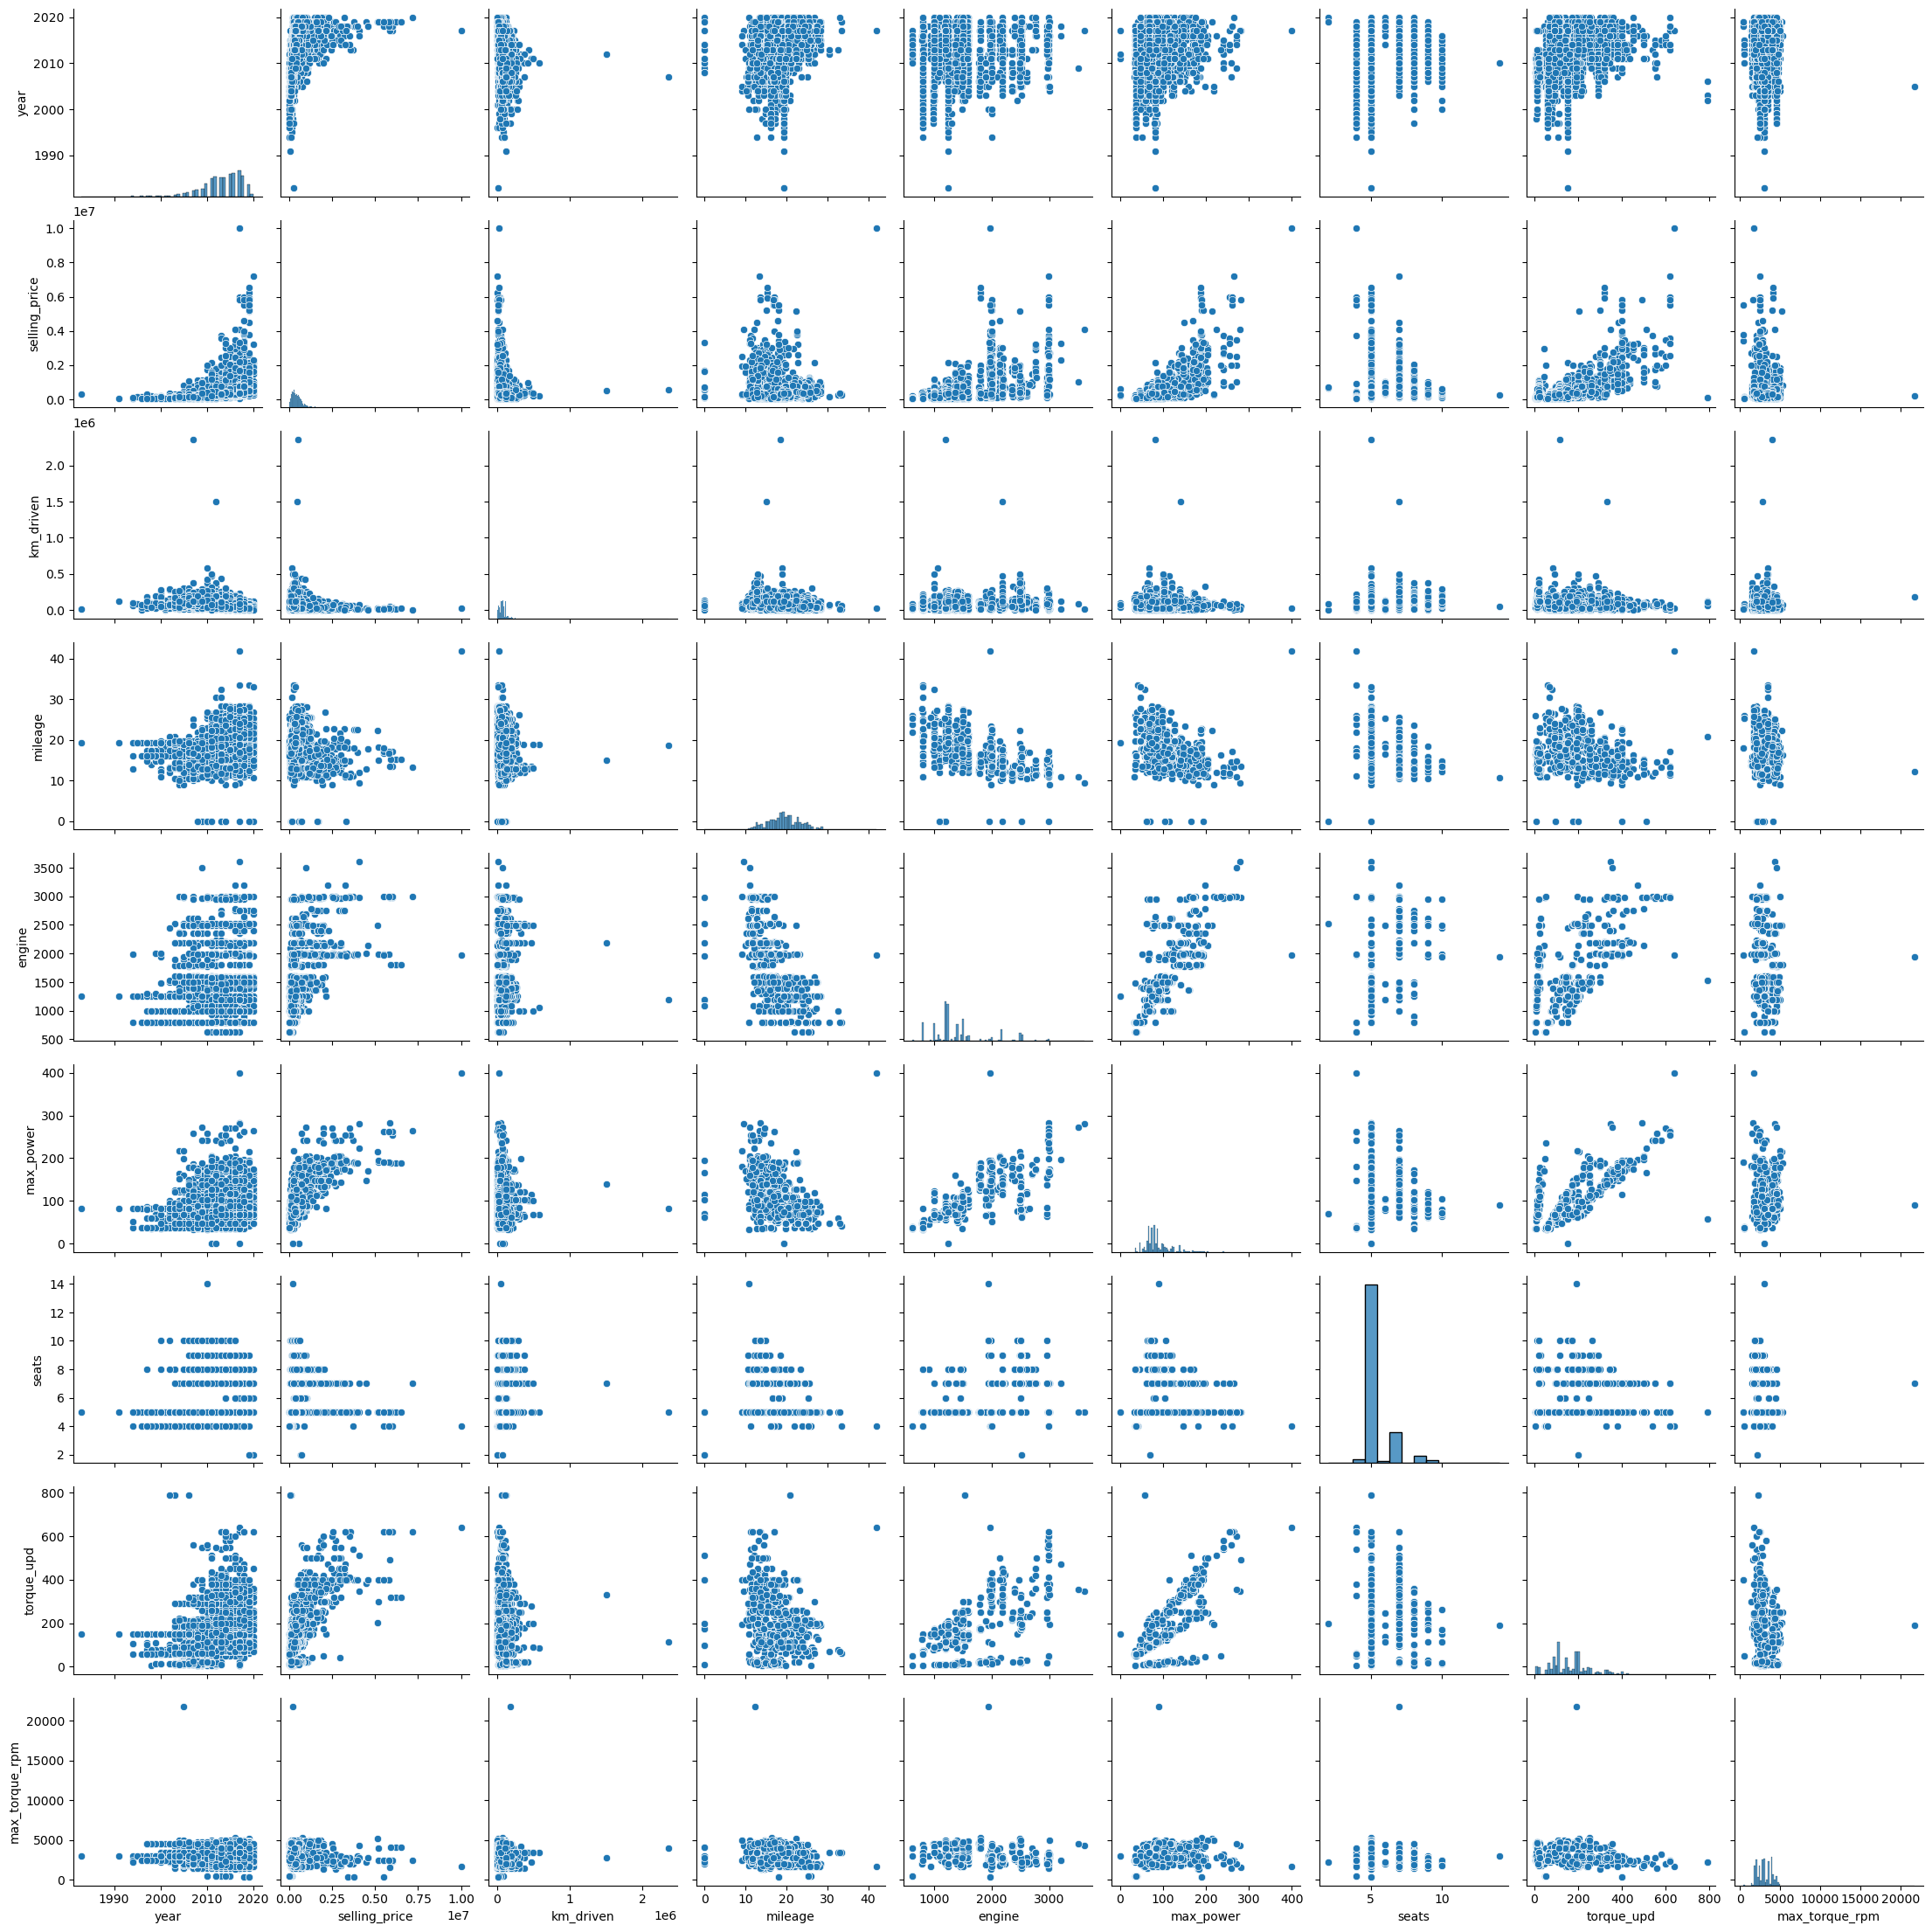

In [29]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

<Axes: >

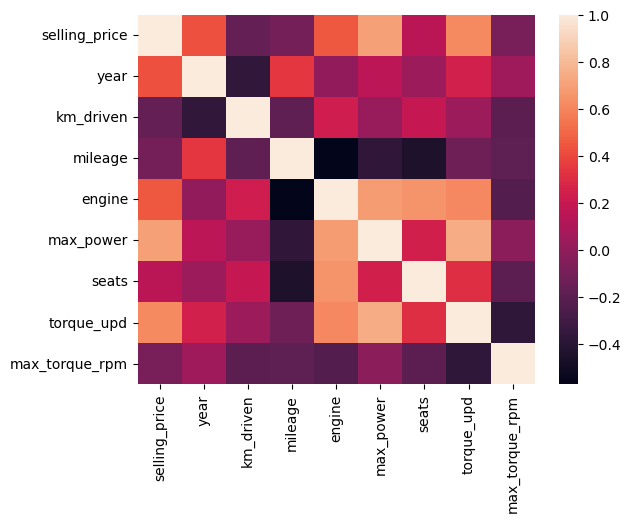

In [30]:
corr = df_train[['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque_upd', 'max_torque_rpm']].corr()
sns.heatmap(corr)

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

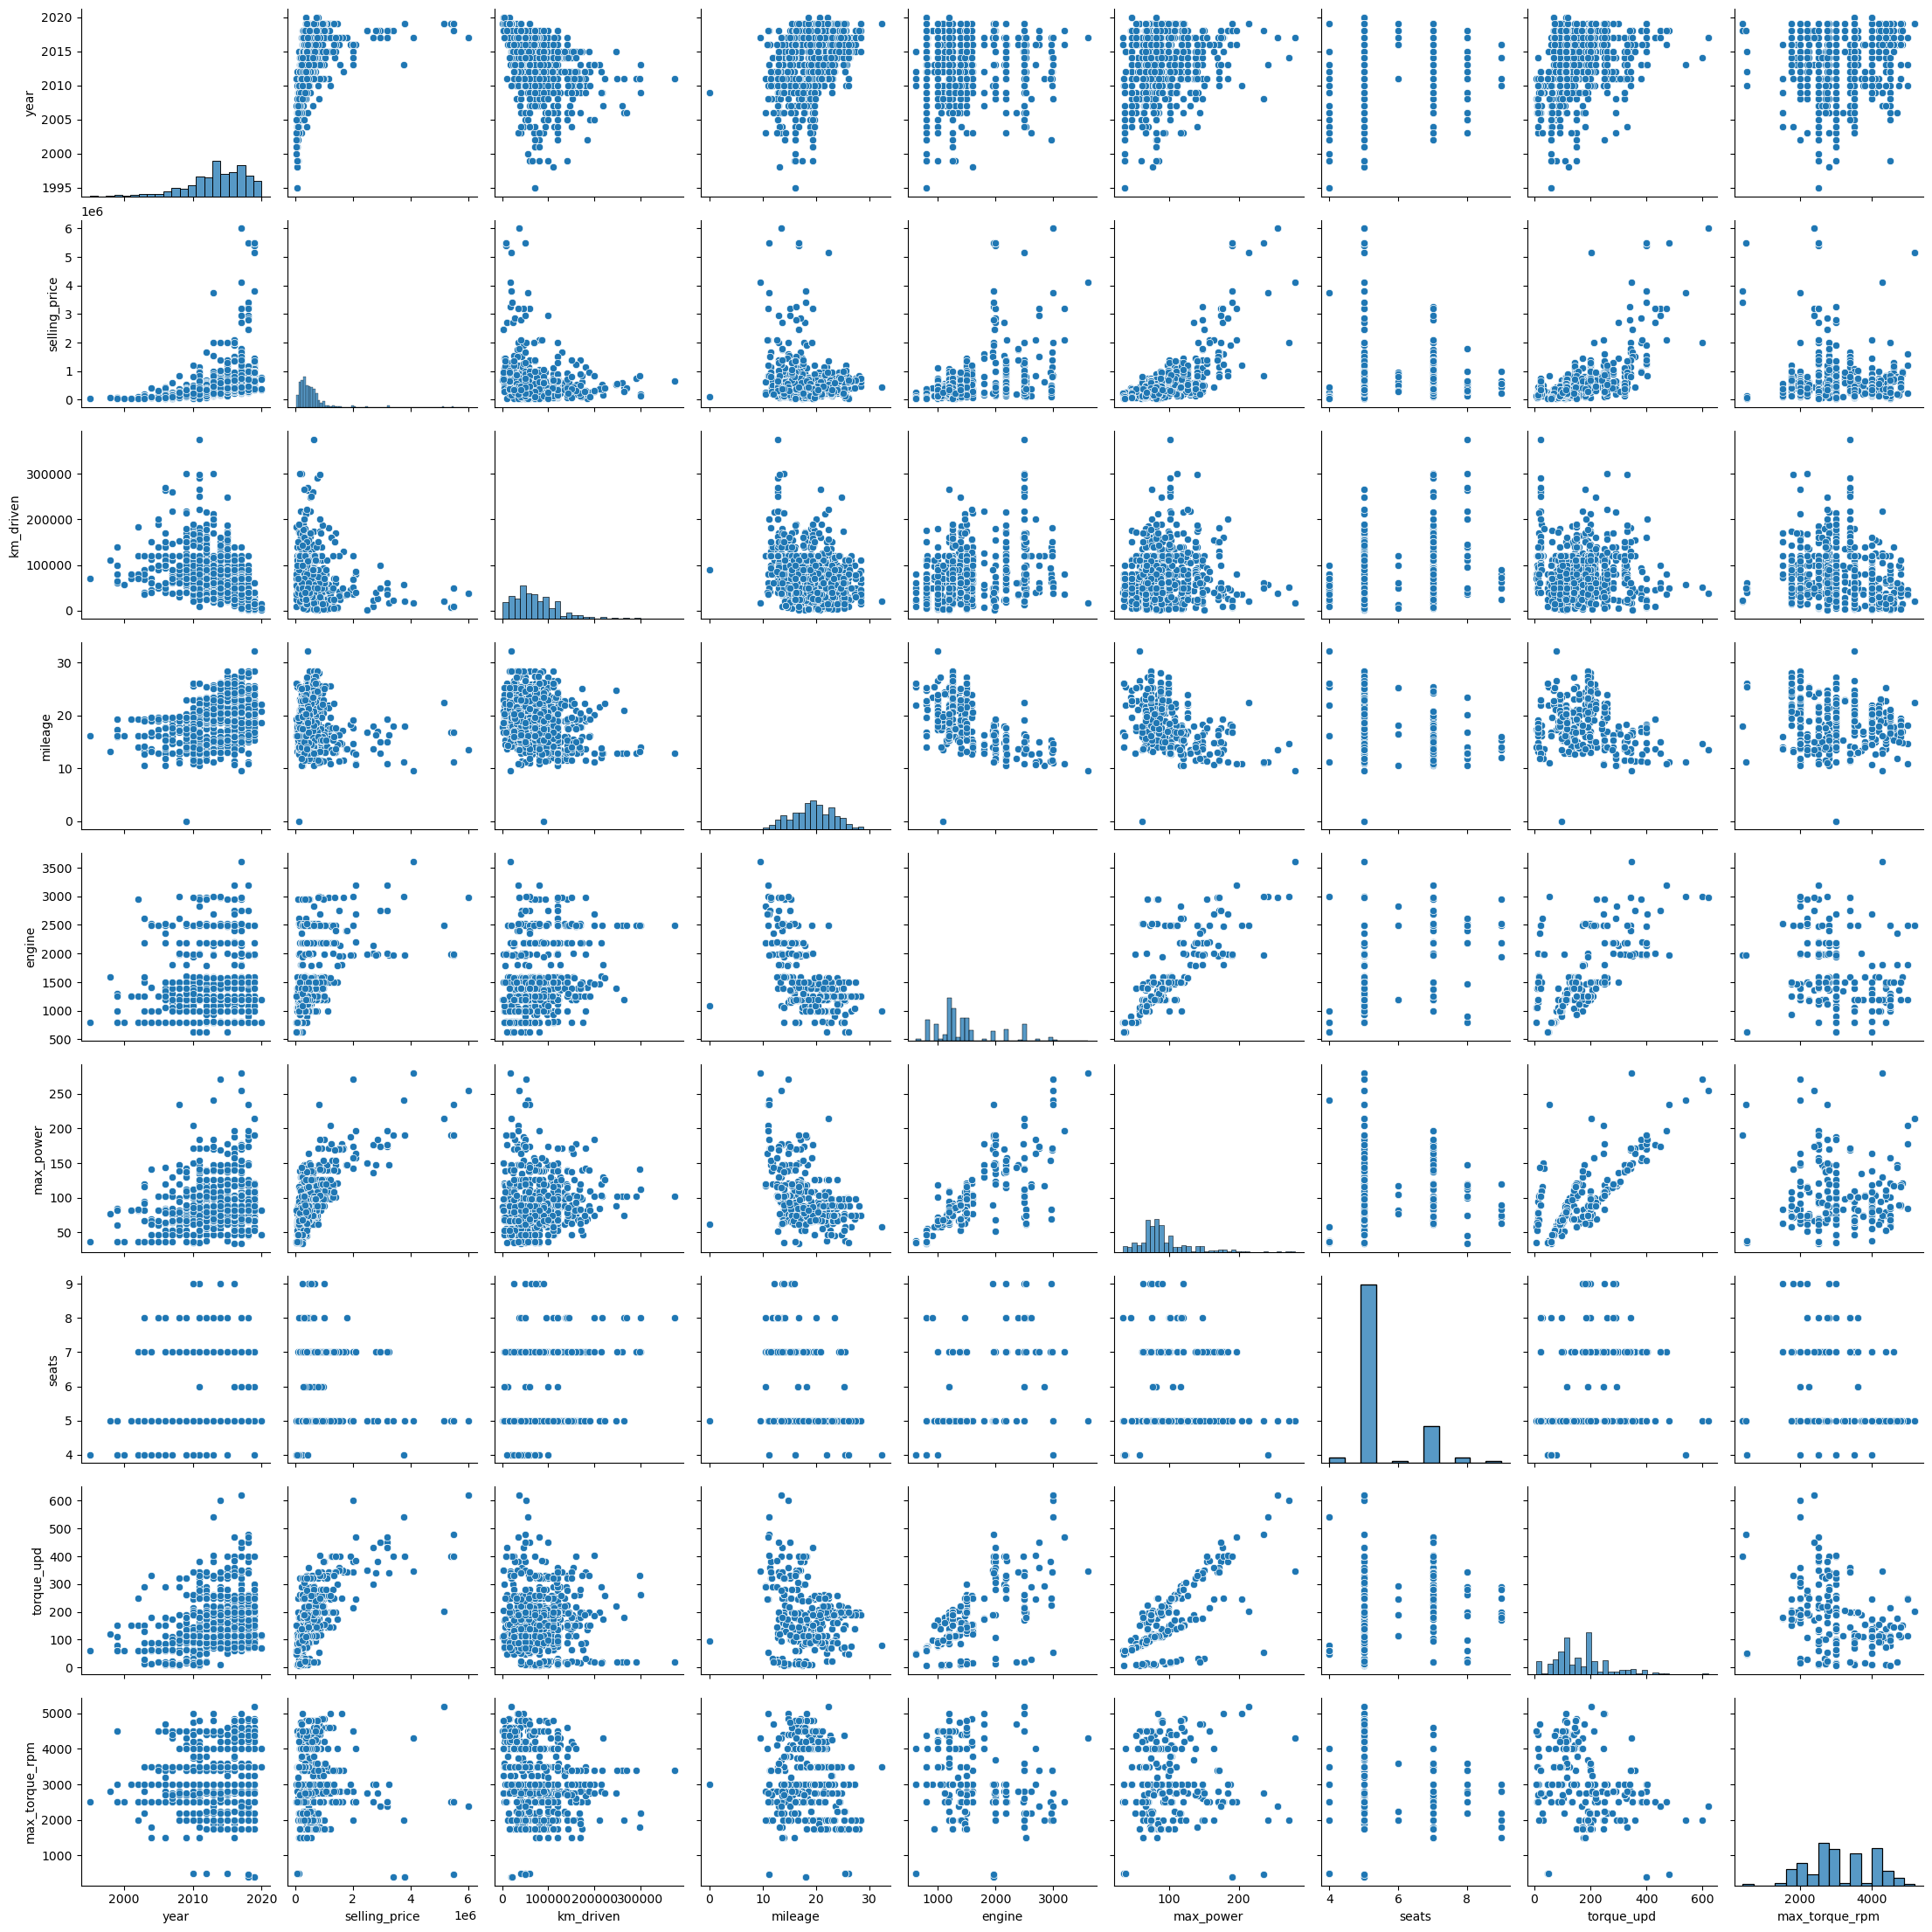

In [31]:
sns.pairplot(df_test)

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<Axes: >

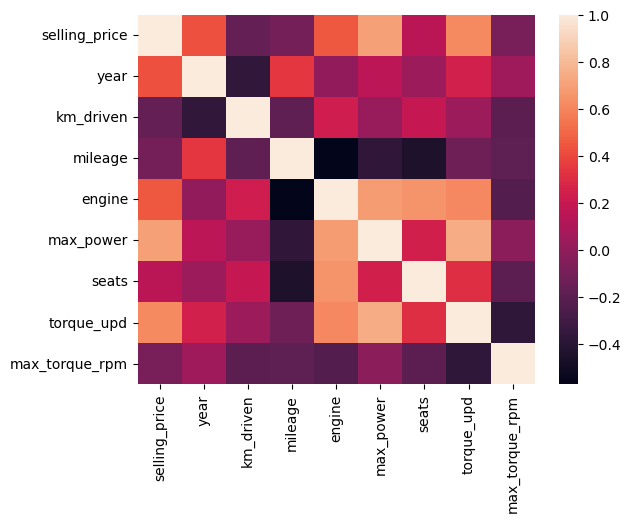

In [32]:
corr = df_train[['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'torque_upd', 'max_torque_rpm']].corr()
sns.heatmap(corr)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

In [33]:
list_features_max_corr = ['year', 'engine', 'max_power', 'torque_upd']

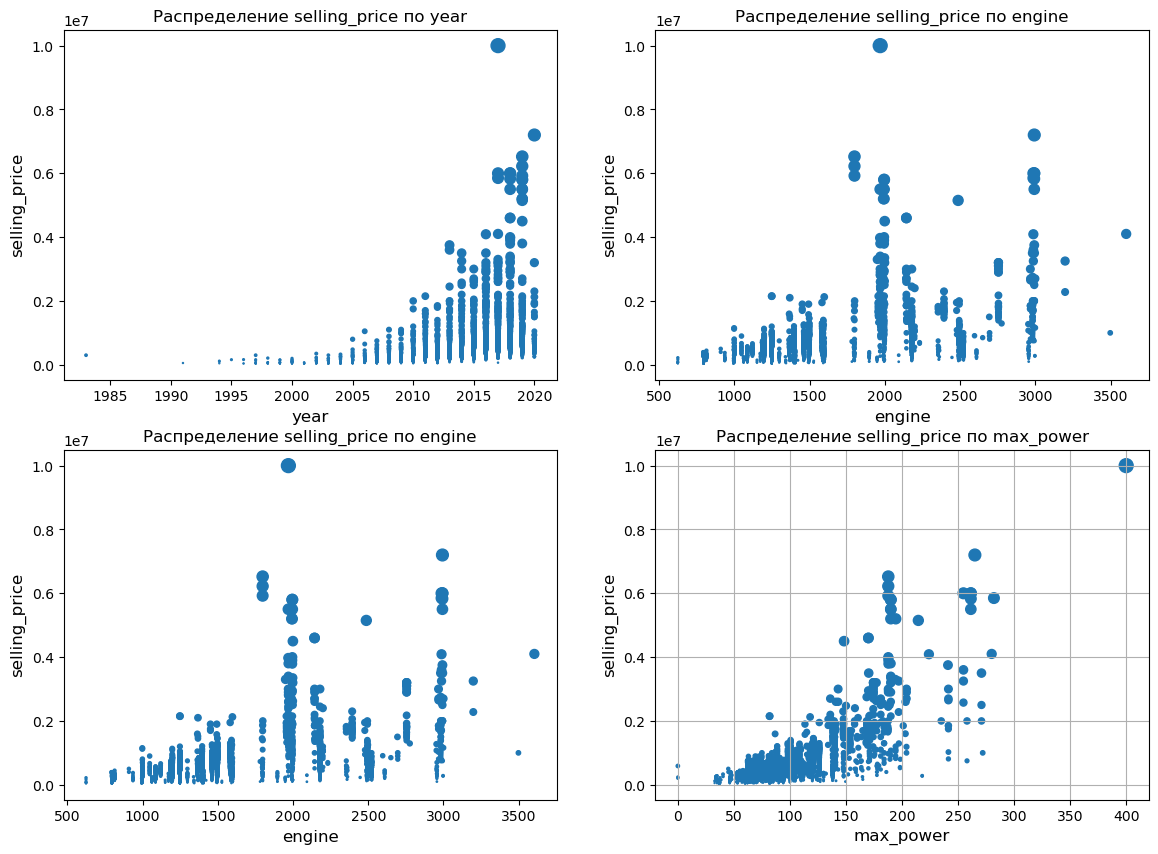

In [34]:
fig, ax = plt.subplots(2,2, figsize=[14, 10])

for i in range(2):
    for j in range(2):
        feature_nm = list_features_max_corr[i+j]
        ax[i][j].scatter(df_train[feature_nm], df_train['selling_price'], s = df_train['selling_price']/100000) 

        ax[i][j].set_ylabel('selling_price', fontsize=12)
        ax[i][j].set_xlabel(f'{feature_nm}', fontsize=12)
        ax[i][j].set_title(f'Распределение selling_price по {feature_nm}', fontsize=12)

plt.grid(True)
#fig.tight_layout()

plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

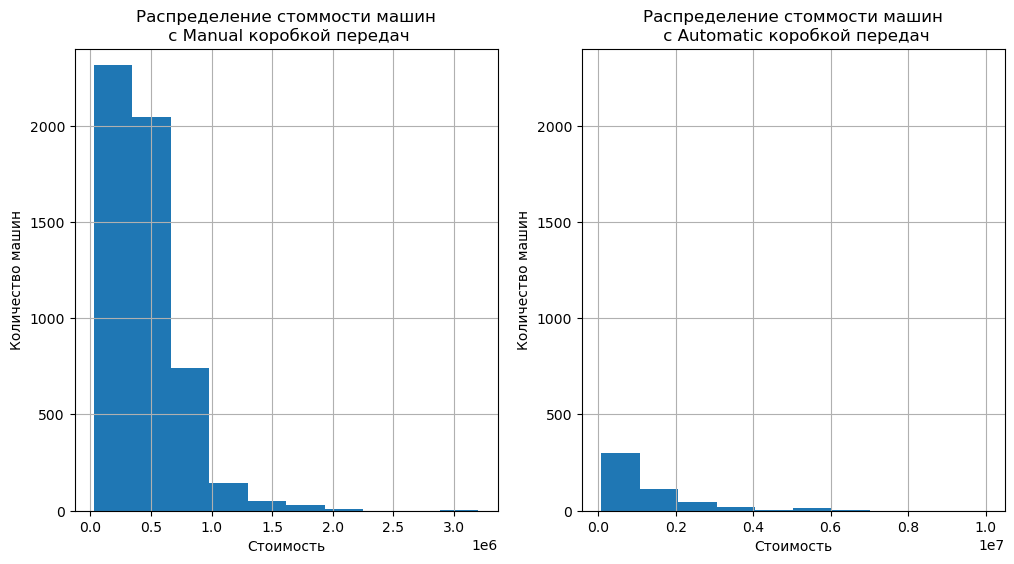

In [35]:
# Коробка передач
transmission_distinct = df_train['transmission'].unique()
transmission_distinct

fig, ax = plt.subplots(1,len(transmission_distinct), figsize=[12, 6])

for i in range(len(transmission_distinct)):
    type = transmission_distinct[i]
    ax[i].hist(df_train[df_train['transmission']==type]['selling_price'])

    ax[i].set_title(f'Распределение стоммости машин\n с {type} коробкой передач')
    ax[i].set_xlabel(f'Стоимость')
    ax[i].set_ylabel(f'Количество машин')
    ax[i].set_ylim(0, 2400)

    ax[i].grid(True)

plt.show()

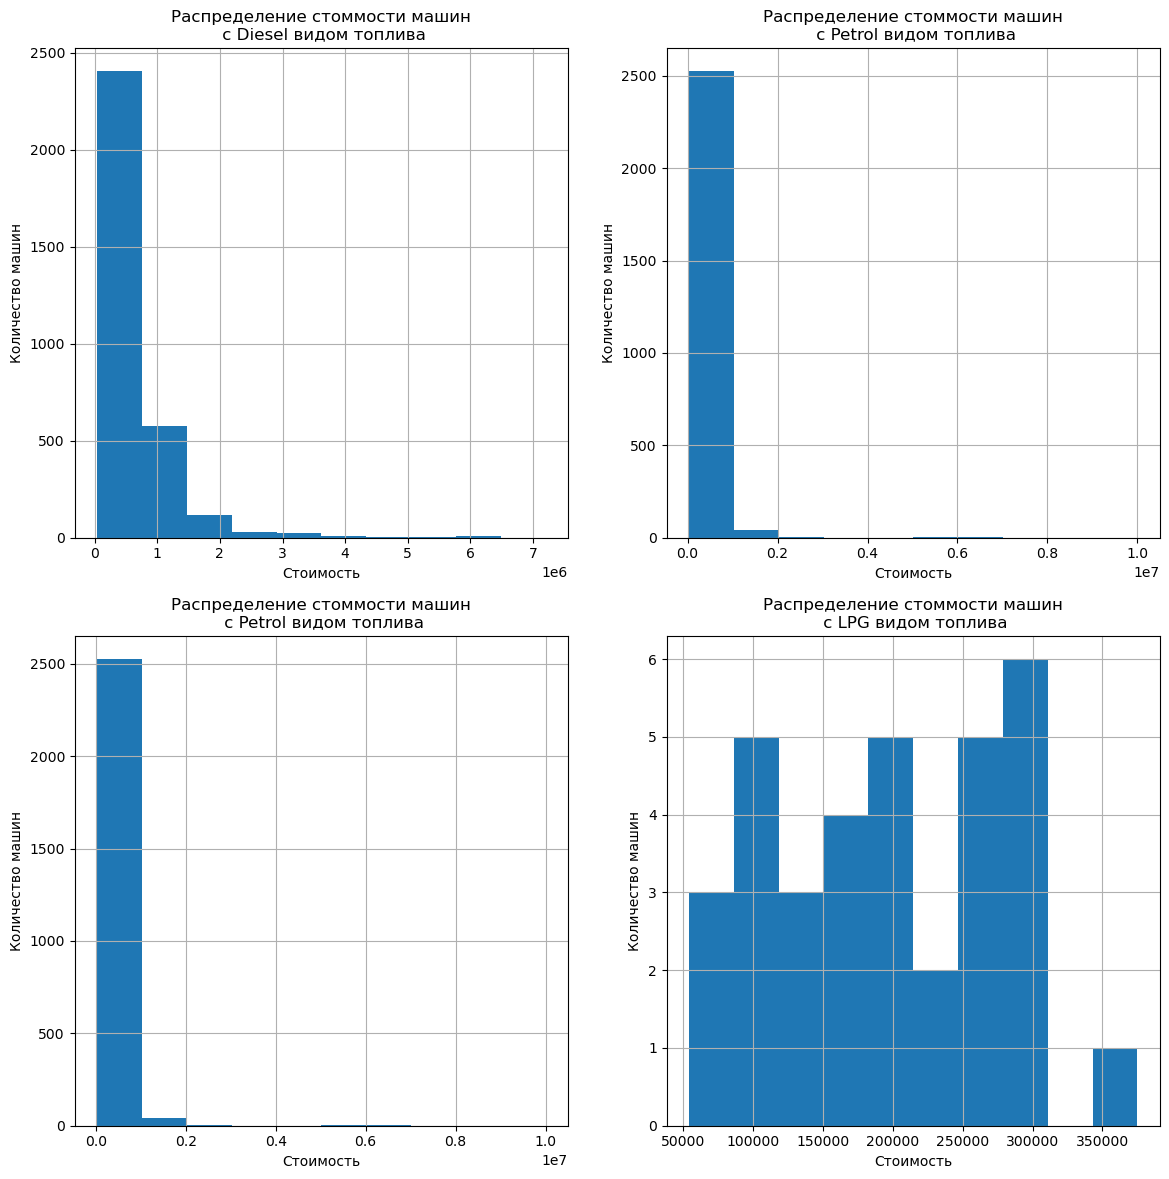

In [36]:
# Топлипо
fuel_distinct = df_train['fuel'].unique()

fig, ax = plt.subplots(2,2, figsize=[14, 14])

for i in range(2):
    for j in range(2):
        type = fuel_distinct[i+j]
        ax[i][j].hist(df_train[df_train['fuel']==type]['selling_price'])
    
        ax[i][j].set_title(f'Распределение стоммости машин\n с {type} видом топлива')
        ax[i][j].set_xlabel(f'Стоимость')
        ax[i][j].set_ylabel(f'Количество машин')
    
        ax[i][j].grid(True)

plt.show()

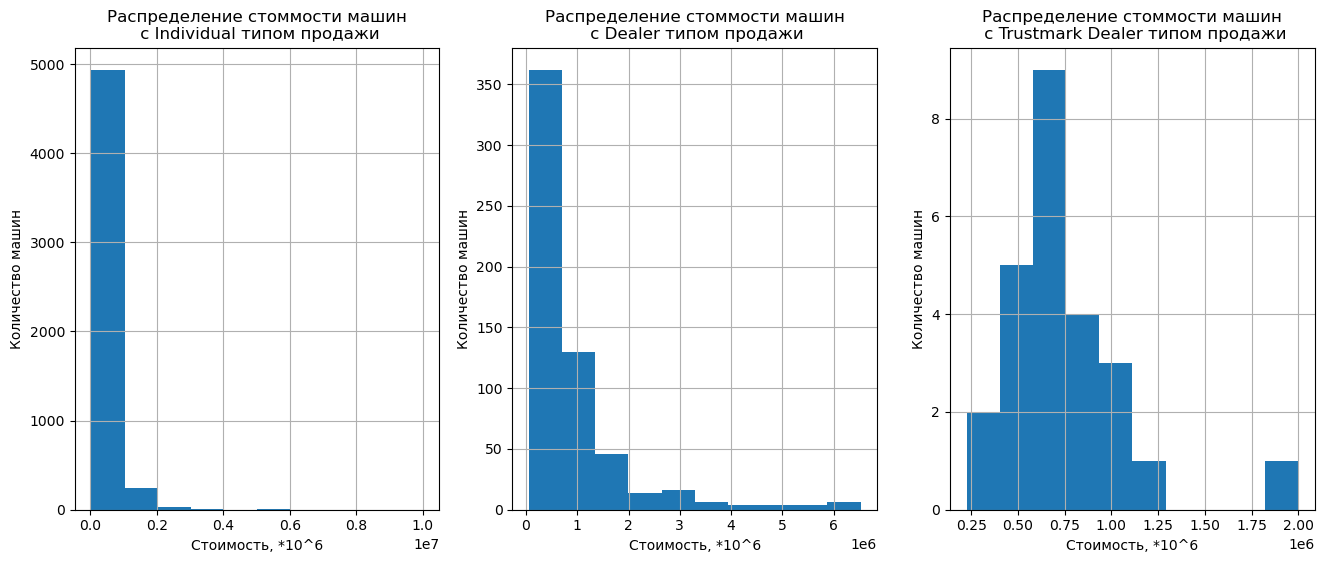

In [37]:
# Коробка передач
seller_type_distinct = df_train['seller_type'].unique()
seller_type_distinct

fig, ax = plt.subplots(1,3, figsize=[16, 6])

for i in range(len(seller_type_distinct)):
    type = seller_type_distinct[i]
    ax[i].hist(df_train[df_train['seller_type']==type]['selling_price'])

    ax[i].set_title(f'Распределение стоммости машин\n с {type} типом продажи')
    if type == 'individual':
        ax[i].set_xlabel(f'Стоимость, *10^7')
    else:
        ax[i].set_xlabel(f'Стоимость, *10^6')        
    ax[i].set_ylabel(f'Количество машин')

    ax[i].grid(True)

plt.show()

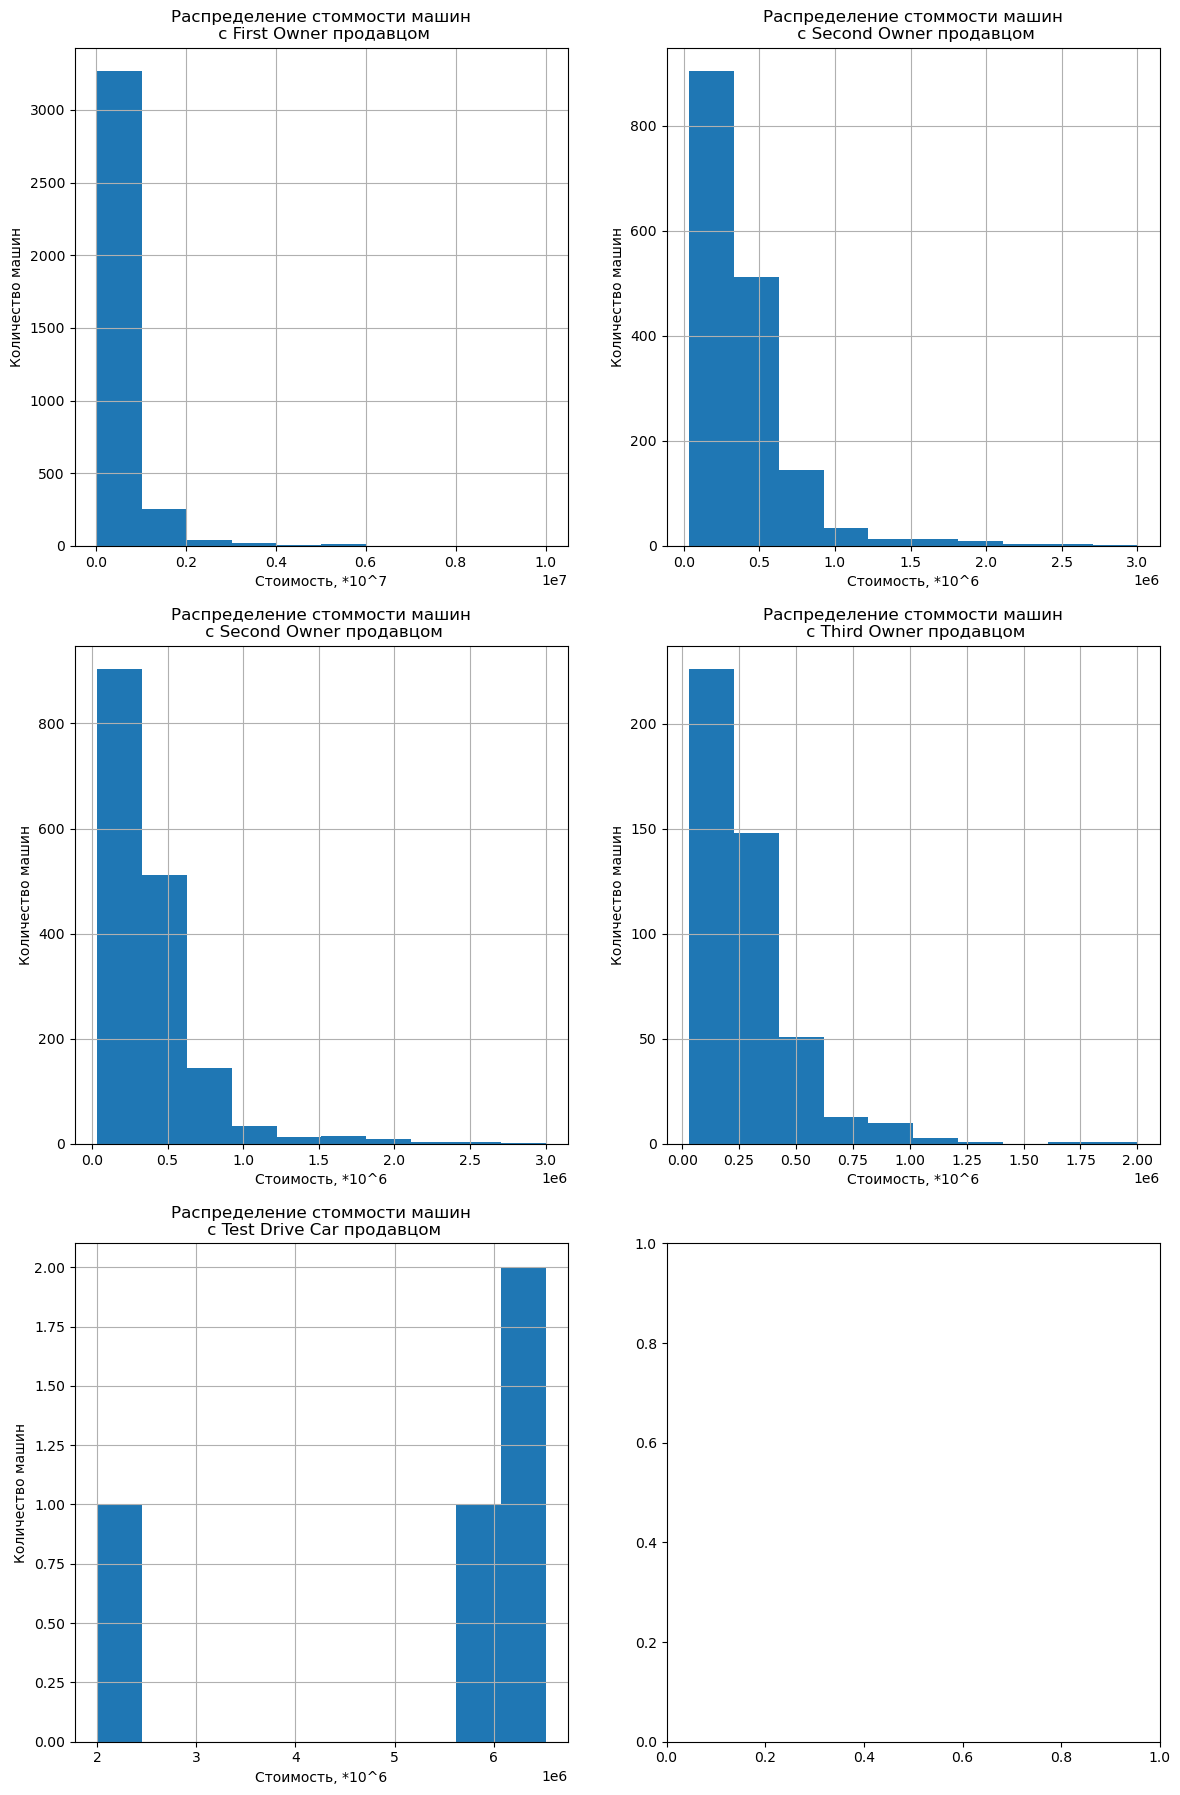

In [38]:
# Продавцы
owner_distinct = df_train['owner'].unique()

fig, ax = plt.subplots(3,2, figsize=[14, 22])

for i in range(2):
    for j in range(2):
        type = owner_distinct[i+j]
        ax[i][j].hist(df_train[df_train['owner']==type]['selling_price'])
    
        ax[i][j].set_title(f'Распределение стоммости машин\n с {type} продавцом')
        if type == 'First Owner':
            ax[i][j].set_xlabel(f'Стоимость, *10^7')
        else:
            ax[i][j].set_xlabel(f'Стоимость, *10^6') 
        ax[i][j].set_ylabel(f'Количество машин')
    
        ax[i][j].grid(True)

type = owner_distinct[4]
ax[2][0].hist(df_train[df_train['owner']==type]['selling_price'])
    
ax[2][0].set_title(f'Распределение стоммости машин\n с {type} продавцом')
ax[2][0].set_xlabel(f'Стоимость, *10^6') 
ax[2][0].set_ylabel(f'Количество машин')
    
ax[2][0].grid(True)
plt.show()

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [39]:
cat_features = ['name', 'fuel', 'seller_type', 'transmission', 'owner']

In [40]:
X_train = df_train.drop(cat_features+['selling_price'], axis=1).copy()
y_train = df_train['selling_price'].copy()

In [41]:
#assert X_train.shape == (5840, 6)
X_train.shape

(5840, 8)

In [42]:
y_test = df_test['selling_price'].copy()
X_test = df_test.drop(cat_features+['selling_price'], axis=1).copy()

In [43]:
#assert X_test.shape == (1000, 6)
X_test.shape

(1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X=X_train)
X_test = scaler.transform(X_test)

In [46]:
# fit & predcit
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [47]:
# error
print('mse: ', MSE(y_test, y_pred))
print('rmse: ', MSE(y_test, y_pred)**0.5)
print('r2_score: ', r2_score(y_test, y_pred))

mse:  226580166397.094
rmse:  476004.3764474167
r2_score:  0.6058300093574189


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [48]:
col_nm = df_train.drop(cat_features+['selling_price'], axis=1).columns

for i in range(len(col_nm)):
    print(col_nm[i], ':', round(lr.coef_[i],2))

year : 161893.6
km_driven : -48548.73
mileage : -14347.58
engine : 17885.26
max_power : 308865.68
seats : -32366.99
torque_upd : 36868.89
max_torque_rpm : -53061.19


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [49]:
from sklearn.linear_model import Lasso

lasso = Lasso()

# fit & predcit
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

In [50]:
# error
print('mse: ', MSE(y_test, y_pred_lasso))
print('rmse: ', MSE(y_test, y_pred_lasso)**0.5)
print('r2_score: ', r2_score(y_test, y_pred_lasso))

mse:  226580849530.37613
rmse:  476005.09401725535
r2_score:  0.6058288209451952


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [51]:
for i in range(len(col_nm)):
    print(col_nm[i], ':', round(lasso.coef_[i],2))
    print('diff with linear model classic:', round(lr.coef_[i]/lasso.coef_[i],4))

year : 161891.7
diff with linear model classic: 1.0
km_driven : -48548.25
diff with linear model classic: 1.0
mileage : -14343.26
diff with linear model classic: 1.0003
engine : 17887.86
diff with linear model classic: 0.9999
max_power : 308865.15
diff with linear model classic: 1.0
seats : -32364.84
diff with linear model classic: 1.0001
torque_upd : 36868.07
diff with linear model classic: 1.0
max_torque_rpm : -53058.48
diff with linear model classic: 1.0001


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [52]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [1, 10, 50, 100, 250, 500, 1000, 2500, 5000, 10000, 20000], 'random_state': [42]}

clf = GridSearchCV(lasso, parameters, cv=10)

In [53]:
# Обучение
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 10, 50, 100, 250, 500, 1000, 2500, 5000,
                                   10000, 20000],
                         'random_state': [42]})

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

10 моделей для каждого параметра alpha, то есть 10*10 = 100 моделей

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [54]:
print("Лучшй параметр alpha: ", clf.best_params_)

Лучшй параметр alpha:  {'alpha': 20000, 'random_state': 42}


In [55]:
lasso_cv = Lasso(alpha = 20000)

# fit & predcit
lasso_cv.fit(X_train, y_train)

y_pred_lasso_cv = lasso_cv.predict(X_test)

# error
print('mse: ', MSE(y_test, y_pred_lasso_cv))
print('rmse: ', MSE(y_test, y_pred_lasso_cv)**0.5)
print('r2_score: ', r2_score(y_test, y_pred_lasso_cv))

mse:  242370005564.18008
rmse:  492310.8830446267
r2_score:  0.5783612292973386


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [56]:
from sklearn.linear_model import ElasticNet

el = ElasticNet()

# params for gridscreach
parameters = {
    'alpha': [0.1, 0.5, 0.7, 1, 5, 10, 50, 100, 250, 500, 1000, 2500, 5000, 10000],
    'l1_ratio' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], # Отвечает за склонность к l1 или l2 регуляризации
    'warm_start' : [True, False],
    'selection' : ['cyclic', 'random'], 
    'random_state': [42]
}

clf_el = GridSearchCV(el, parameters, cv=10)

clf_el.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.5, 0.7, 1, 5, 10, 50, 100, 250, 500,
                                   1000, 2500, 5000, 10000],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1.0],
                         'random_state': [42],
                         'selection': ['cyclic', 'random'],
                         'warm_start': [True, False]})

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [57]:
# Лучшие параметры модели 
clf_el.best_params_

{'alpha': 0.7,
 'l1_ratio': 0.8,
 'random_state': 42,
 'selection': 'random',
 'warm_start': True}

In [58]:
el_best_params_ml = ElasticNet(alpha = 0.7, l1_ratio = 0.8, random_state=42, selection='random', warm_start=True)

el_best_params_ml.fit(X_train, y_train)

y_pred_elastic = el_best_params_ml.predict(X_test)

In [59]:
# error ElasticNet
print('mse: ', MSE(y_test, y_pred_elastic))
print('rmse: ', MSE(y_test, y_pred_elastic)**0.5)
print('r2_score: ', r2_score(y_test, y_pred_elastic))

mse:  243560181946.26193
rmse:  493518.1677975614
r2_score:  0.5762907399829029


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [60]:
X_train_cat = df_train.drop(['selling_price', 'name'], axis=1).copy()
y_train_cat = df_train['selling_price'].copy()

In [61]:
#assert X_train_cat.shape == (5840, 10)

X_train_cat.shape

(5840, 12)

In [62]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [63]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

ohe = OneHotEncoder(drop='first')

ohe.fit(X_train_cat)

transformed_ohe = ohe.transform(X_train_cat)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [64]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridg_ml = Ridge()

# params for gridscreach
parameters = {
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 
                'sag', 'saga'],
    'random_state': [42]
}

clf_rid = GridSearchCV(ridg_ml, parameters, cv=10)

clf_rid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0],
                         'random_state': [42],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

In [65]:
clf_rid.best_params_

{'alpha': 1.0, 'random_state': 42, 'solver': 'saga'}

In [66]:
ridge_best_params_ml = Ridge(alpha = 1, solver = 'saga')

ridge_best_params_ml.fit(X_train, y_train)

y_pred_ridge = ridge_best_params_ml.predict(X_test)

In [67]:
y_pred_ridge = ridge_best_params_ml.predict(X_test)

In [68]:
# error: baseline LinearRegression() - no params  VS ridge best_params_
print('baseline_mse: ', MSE(y_test, y_pred))
print('ridge_mse: ', MSE(y_test, y_pred_ridge))

print('baseline_rmse: ', MSE(y_test, y_pred)**0.5)
print('ridgermse: ', MSE(y_test, y_pred_ridge)**0.5)

print('baseline_r2_score: ', r2_score(y_test, y_pred))
print('ridger2_score: ', r2_score(y_test, y_pred_ridge))


baseline_mse:  226580166397.094
ridge_mse:  226608504274.045
baseline_rmse:  476004.3764474167
ridgermse:  476034.1419205612
baseline_r2_score:  0.6058300093574189
ridger2_score:  0.6057807113942733


# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

## EDA

In [69]:
# Сделаем копии фрейма данных
df_train_cat = df_train_cp.copy()
df_test_cat = df_test_cp.copy()

___Предобработка___

In [70]:
# Обработаем mileage engine и max_power
df_test_cat['mileage'] = df_test_cat['mileage'].apply(lambda x: row_to_float(x))
df_test_cat['engine'] = df_test_cat['engine'].apply(lambda x: row_to_float(x))
df_test_cat['max_power'] = df_test_cat['max_power'].apply(lambda x: row_to_float(x))

# Обработаем mileage engine и max_power
df_train_cat['mileage'] = df_train_cat['mileage'].apply(lambda x: row_to_float(x))
df_train_cat['engine'] = df_train_cat['engine'].apply(lambda x: row_to_float(x))
df_train_cat['max_power'] = df_train_cat['max_power'].apply(lambda x: row_to_float(x))

In [71]:
# Обработаем torque
df_test_cat['torque_upd'], df_test_cat['max_torque_rpm'] = torque_split(df_test_cat['torque'])

df_train_cat['torque_upd'], df_train_cat['max_torque_rpm'] = torque_split(df_train_cat['torque'])

In [72]:
# Дропнем старый признак
df_train_cat = df_train_cat.drop('torque', axis=1)
df_test_cat = df_test_cat.drop('torque', axis=1)

___Пропуски___

In [73]:
df_test_cat.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage           19
engine            19
max_power         19
seats             19
torque_upd        19
max_torque_rpm    19
dtype: int64

Будем заполнять медианой в разрезе года выпуска машины

In [74]:
# Создадим df с значениями для заполнения пропусков
df_fillna = df_train_cat.groupby('year')[['mileage', 'engine', 'seats', 'torque_upd', 'max_torque_rpm', 'max_power']].median()
df_fillna.tail()  

,mileage,engine,seats,torque_upd,max_torque_rpm,max_power
year,,,,,,
2016,20.40,1248.0,5.0,172.50,3400.0,86.80
2017,21.10,1248.0,5.0,190.00,3000.0,85.30
2018,21.19,1248.0,5.0,173.00,3250.0,84.00
2019,19.44,1199.0,5.0,142.00,4000.0,88.76
2020,20.89,1197.0,5.0,113.75,4000.0,81.86


In [75]:
# Для сервера
#df_fillna.to_csv('df_fillna.csv', sep=';')
#pd.read_csv('df_fillna.csv', sep=';')

In [76]:
def nan_input(df_input: pd.DataFrame, df_fillna: pd.DataFrame = df_fillna) -> pd.DataFrame:
    '''Функция заполняет пропуски в входном датафрейме на основе второго входного датафрейма

    Для заполнения df_input используются значения из матрицы df_fillna, 
    на выход отдаем экземпляр без пропусков df_input

    Заполнение происходит по следующим правилам:
    Для столбца Х находим пропуск - смотрим на год машины, в строчке где нашли пропуск.
    Далее из таблицы df_fillna вытягиваем значение по столбцу Х и этому же году. 
    Это медианое значение - им заполним пропуск.
    '''
    df = df_input.copy()
    col_to_fillna = ['mileage', 'engine', 'seats', 'torque_upd', 'max_torque_rpm', 'max_power']
    for col in col_to_fillna: # для каждой колонки
        for i in range(len(df)): # для каждой строчки
            if math.isnan(df[col][i]) == True: # если в ячейке пропуск
                year = df['year'][i] # смотрим на год
                # заполняем соответсвующим значением медианы столбца по году из df_fillna
                if year < 1996: # до 1996 мало данных - заполним ближайшем соседом 1994
                    year = 1994
                    df[col][i] = df_fillna.loc[year][col]
                else:
                    df[col][i] = df_fillna.loc[year][col]
    return df

In [77]:
df_train_cat = nan_input(df_train_cat)
df_test_cat = nan_input(df_test_cat)

In [78]:
p = df_train_cat.isna().sum().sum() + df_test_cat.isna().sum().sum()
print(f'Всего пропусков осталось {p}')

Всего пропусков осталось 0


___Лет машине___

Года будем округлять в большую сторону (6 мес -> 1 год)

In [79]:
# Последний год в выборке + 1
max_year = df_train_cat['year'].max() + 1

In [80]:
# Убедимся, что у нас не возникнет ошибки на тесте из за того, что срезы из разных годов
df_test_cat['year'].max() == df_train_cat['year'].max()

True

In [81]:
# Найдем возраст машины, округленный в большую сторону
df_train_cat['car_age'] = max_year - df_train_cat['year']
df_test_cat['car_age'] = max_year - df_test_cat['year']

___Средний пробег за год ползования___

In [82]:
df_train_cat['km_driven_per_year'] = round(df_train_cat['km_driven'] / (max_year - df_train_cat['year']))
df_test_cat['km_driven_per_year'] = round(df_test_cat['km_driven'] / (max_year - df_test_cat['year']))

df_train_cat[['year','km_driven', 'km_driven_per_year']].head()

,year,km_driven,km_driven_per_year
0,2014,145500,20786.0
1,2014,120000,17143.0
2,2010,127000,11545.0
3,2007,120000,8571.0
4,2017,45000,11250.0


___Марка авто___

In [83]:
# Вытащим название марки - первое слово в столбце name
df_train_cat['model'] = df_train_cat['name'].apply(lambda x: x.split()[0])
df_test_cat['model'] = df_test_cat['name'].apply(lambda x: x.split()[0])

df_train_cat[['model', 'name']][500:506]

,model,name
500,Maruti,Maruti Ertiga ZDI
501,Tata,Tata Manza Aura Quadrajet
502,Hyundai,Hyundai Verna 1.6 CRDi EX AT
503,Maruti,Maruti Alto K10 LXI
504,Maruti,Maruti Alto K10 LXI
505,Mahindra,Mahindra Scorpio 1.99 S10


___Продавцы___

In [84]:
df_train_cat.groupby(['seller_type'])['year'].count()

seller_type
Dealer               967
Individual          5826
Trustmark Dealer     206
Name: year, dtype: int64

In [85]:
# Объединим Dealer и Trustmark Dealer вместе, так как во втором мало примеров/
# Сразу создадим бинарную фичу

df_train_cat['seller_individual_flg'] = df_train_cat['seller_type'].apply(lambda x: 1 if x=='Individual' else 0)
df_test_cat['seller_individual_flg'] = df_test_cat['seller_type'].apply(lambda x: 1 if x=='Individual' else 0)

___Средний срок владения___

(Test Drive Car приравняем к 3 годам), неизвестные значения в 4 года

In [86]:
def mean_tear_own(elem: str) -> int:
    ''' Функция для реализации подсчета среднего срока владения
    
    Переведем строчное значение "Кол-во владельцев" в целое число и сократим кол-во значений переменной
    
    input <- cat features str: owner number
    output -> cat features int: owner number
    '''
    if elem == 'First Owner':
        return 1
    if elem == 'Second Owner':
        return 2
    if (elem == 'Third Owner') | (elem == 'Test Drive Car'):
        return 3
    else:
        return 4

In [87]:
# Получим кол-во владельцев (число)
df_train_cat['mean_own_year'] = df_train_cat['owner'].apply(lambda x: mean_tear_own(x))
df_test_cat['mean_own_year'] = df_train_cat['owner'].apply(lambda x: mean_tear_own(x))

# Сколько в среднем владели машиной?
df_train_cat['mean_own_year'] = df_train_cat['car_age'] / df_train_cat['mean_own_year']
df_test_cat['mean_own_year'] = df_test_cat['car_age'] / df_test_cat['mean_own_year']

<Axes: >

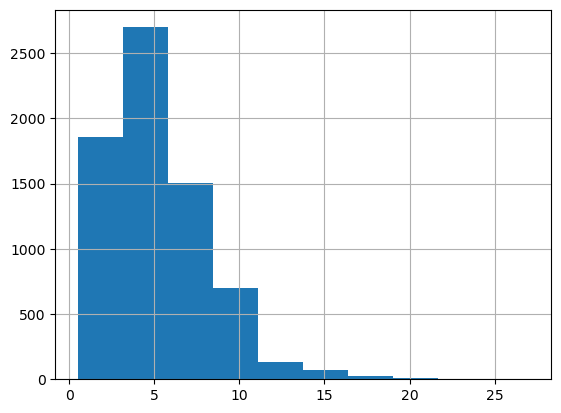

In [88]:
# распределение среднего срока владения машиной
df_train_cat['mean_own_year'].hist()

___Optimizate owner___

Выражу "Экспертное" мнение и предлагаю уровнять третьего владельца и более, а так же "машина тест драйва" 

In [89]:
df_train_cat.groupby(['seller_individual_flg','owner'])['year'].count()

seller_individual_flg  owner               
0                      First Owner             1052
                       Second Owner             114
                       Test Drive Car             4
                       Third Owner                3
1                      First Owner             3535
                       Fourth & Above Owner     144
                       Second Owner            1677
                       Third Owner              470
Name: year, dtype: int64

In [90]:
def optim_owner(val: str) -> str:
    '''
    input <- Cat feature owner
    ouput -> optimizated feature owner
    '''
    if val in ['First Owner', 'Second Owner']:
        return val
    else:
        return 'Third & Above Owner'

In [91]:
df_train_cat['owner'] = df_train_cat['owner'].apply(lambda x: optim_owner(x))

In [92]:
df_test_cat['owner'] = df_test_cat['owner'].apply(lambda x: optim_owner(x))

___engine / max_power___

Интерпретирую engine как объем двигателя (в см2 получается), а max power как мего мощность (например в лошадиных силах)

В результате получим мощность на м2

In [93]:
# Мощность детим на объем в М**2
df_train_cat['pover_per_V_engine'] = df_train_cat['max_power'] / (df_train_cat['engine'] * 0.001)
df_test_cat['pover_per_V_engine'] = df_test_cat['max_power'] / (df_test_cat['engine'] * 0.001)

___Квадрат числовых признаков___

In [94]:
num_features = [
    'year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque_upd',
    'max_torque_rpm', 'car_age', 'km_driven_per_year', 'mean_own_year', 'pover_per_V_engine'
]

In [95]:
# Возведем в квадрат
for col in num_features:
    new_col = col + '_sqr'
    df_train_cat[new_col] = round(df_train_cat[col]**2, 2)
    df_test_cat[new_col] = round(df_test_cat[col]**2, 2)

___drop old col___

In [96]:
# дропнем категориальыне столбцы которые уже перевели в бинарные переменные или модернизировали
drop_old_colum = ['name', 'seller_type']
df_train_cat = df_train_cat.drop(drop_old_colum, axis=1)
df_test_cat = df_test_cat.drop(drop_old_colum, axis=1)

# дропнем категориальыне столбцы которые уже перевели в бинарные переменные
df_train_cat = df_train_cat.drop('year', axis=1)
df_test_cat = df_test_cat.drop('year', axis=1)

In [97]:
# Проверим не потеряли ли столбцы
sum(df_train_cat.columns == df_test_cat.columns) == len(df_train_cat.columns)

True

___Split data___

In [98]:
X_train = df_train_cat.drop('selling_price', axis=1).copy()
y_train = df_train_cat['selling_price'].copy()

X_test = df_test_cat.drop('selling_price', axis=1).copy()
y_test = df_test_cat['selling_price'].copy()

___OHE___

In [99]:
df_train_cat.head()

,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,torque_upd,...,km_driven_sqr,mileage_sqr,engine_sqr,max_power_sqr,torque_upd_sqr,max_torque_rpm_sqr,car_age_sqr,km_driven_per_year_sqr,mean_own_year_sqr,pover_per_V_engine_sqr
0,450000,145500,Diesel,Manual,First Owner,23.40,1248.0,74.00,5.0,190.00,...,21170250000,547.56,1557504.0,5476.00,36100.00,4000000.0,49,432057796.0,49.00,3515.88
1,370000,120000,Diesel,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.00,...,14400000000,446.90,2244004.0,10716.39,62500.00,6250000.0,49,293882449.0,12.25,4775.57
2,225000,127000,Diesel,Manual,First Owner,23.00,1396.0,90.00,5.0,22.40,...,16129000000,529.00,1948816.0,8100.00,501.76,7562500.0,121,133287025.0,121.00,4156.37
3,130000,120000,Petrol,Manual,First Owner,16.10,1298.0,88.20,5.0,11.50,...,14400000000,259.21,1684804.0,7779.24,132.25,20250000.0,196,73462041.0,196.00,4617.30
4,440000,45000,Petrol,Manual,First Owner,20.14,1197.0,81.86,5.0,113.75,...,2025000000,405.62,1432809.0,6701.06,12939.06,16000000.0,16,126562500.0,16.00,4676.87


In [100]:
categorical_cols = ['fuel', 'transmission', 'owner', 'seats', 'model'] 

ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse = False)

# Применим OneHotEncoder только к категориальным столбцам
ohe.fit(X_train[categorical_cols])

X_train_ohe = ohe.transform(X_train[categorical_cols])
X_test_ohe = ohe.transform(X_test[categorical_cols])

# Преобразуем результат в DataFrame
X_train_ohe = pd.DataFrame(X_train_ohe)
X_test_ohe = pd.DataFrame(X_test_ohe)

X_train_ohe.columns = list(ohe.get_feature_names_out(categorical_cols))
X_test_ohe.columns = list(ohe.get_feature_names_out(categorical_cols))

# Объедините DataFrame
X_train = pd.concat([X_train.drop(categorical_cols, axis=1), X_train_ohe], axis=1)
X_test = pd.concat([X_test.drop(categorical_cols, axis=1), X_test_ohe], axis=1)

In [101]:
# Сохраняем обученный OneHotEncoder в файл
#with open('ohe.pickle', 'wb') as f:
#   pickle.dump(ohe, f)

___StandardScaler___

In [102]:
X_train_columsn = X_train.columns

In [103]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X=X_train)
X_test = scaler.transform(X_test)

In [104]:
# Сохраняем обученный StandardScaler в файл
#with open('StandardScaler.pickle', 'wb') as f:
#   pickle.dump(scaler, f)

## baseline model

In [105]:
lr = LinearRegression()

# fit & predcit
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# error
print('mse: ', MSE(y_test, y_pred))
print('rmse: ', MSE(y_test, y_pred)**0.5)
print('r2_score: ', r2_score(y_test, y_pred))

mse:  1.4886568355584865e+30
rmse:  1220105255934293.0
r2_score:  -2.5897405773536794e+18


Чего-то страшное, посмотрим на веса

In [106]:
lr.intercept_, lr.coef_

(640956.6378109048,
 array([-5.71566153e+03,  1.34231259e+05, -2.85046738e+05,  2.14850991e+05,
        -8.00093328e+03, -7.55404778e+04, -1.27222243e+17, -3.19637417e+04,
        -2.56415072e+04, -1.89444526e+04, -4.01509846e+05, -1.26632934e+17,
         2.49338885e+04, -1.69300678e+05,  1.62831547e+05,  1.85774807e+05,
         2.79876446e+04,  3.24373916e+04,  6.24396918e+14, -6.75551189e+03,
         1.82645384e+04,  3.25343470e+05,  8.48664691e+15,  4.92389737e+16,
         6.87125128e+15,  4.91216560e+16, -1.02576153e+04,  8.91559351e+16,
         8.18616546e+16,  5.33439652e+16,  5.85360616e+15,  4.28820387e+16,
         1.17021917e+16,  1.39165763e+17,  3.03029961e+16,  1.18302967e+17,
         5.88099889e+16,  3.49455119e+16,  1.80200950e+16,  4.13942038e+15,
        -5.64718265e+14, -2.00481324e+15, -3.28521310e+15, -4.58940221e+15,
        -5.64718265e+14, -2.43060229e+15, -2.10708451e+15, -7.98460977e+14,
        -5.85710852e+15, -6.36274311e+15, -1.02726441e+16, -7.289439

4.82350143e+16 - а вот и причины, почему нам не составит труда победить baseline

___new baseline model (l1)___

In [107]:
l1_lr = Lasso()

# fit & predcit
l1_lr.fit(X_train, y_train)

y_pred_lasso = l1_lr.predict(X_test)

# error
print('mse: ', MSE(y_test, y_pred_lasso))
print('rmse: ', MSE(y_test, y_pred_lasso)**0.5)
print('r2_score: ', r2_score(y_test, y_pred_lasso))

mse:  80281935106.9258
rmse:  283340.6697015552
r2_score:  0.8603376009778096


___new baseline model Ridge___

In [108]:
ridge_lr = Ridge()

# fit & predcit
ridge_lr.fit(X_train, y_train)

y_pred_r = ridge_lr.predict(X_test)

# error
print('mse: ', MSE(y_test, y_pred_r))
print('rmse: ', MSE(y_test, y_pred_r)**0.5)
print('r2_score: ', r2_score(y_test, y_pred_r))

mse:  80403499652.85681
rmse:  283555.1086700023
r2_score:  0.8601261213205473


In [109]:
#ridge_lr.intercept_, ridge_lr.coef_

In [110]:
w0 = [float(ridge_lr.intercept_)]
wi = list(ridge_lr.coef_)

In [111]:
weight_model_ridge = np.array(w0 + wi)

In [112]:
# Сохраняем веса лучшей моедли в файл
#with open('model_weight.pickle', 'wb') as f:
#   pickle.dump(weight_model_ridge, f)

In [113]:
list_w = weight_model_ridge.tolist()

In [114]:
df_weight = pd.DataFrame(list_w[1:]).T
df_weight.columns = X_train_columsn

In [115]:
# Интерпретация весов лучшей модели
df_weight.T.sort_values(0)

,0
pover_per_V_engine,-354907.246775
car_age,-239958.400986
engine,-219270.142318
mileage_sqr,-166685.899735
max_torque_rpm,-75307.170598
...,...
max_power_sqr,221842.452215
year_sqr,242484.042937
model_BMW,244638.277679
car_age_sqr,285747.424870


___new baseline elastic___

In [116]:
elastic_lr = ElasticNet()

# fit & predcit
elastic_lr.fit(X_train, y_train)

y_pred = elastic_lr.predict(X_test)

# error
print('mse: ', MSE(y_test, y_pred))
print('rmse: ', MSE(y_test, y_pred)**0.5)
print('r2_score: ', r2_score(y_test, y_pred))

mse:  104493694383.50969
rmse:  323254.84433107835
r2_score:  0.8182176348781912


In [117]:
#elastic_lr.intercept_, elastic_lr.coef_

## Ridge_model_grid

In [118]:
%%time
Ridge_cv = Ridge()

# params for gridscreach
parameters = {
    'alpha': np.concatenate([np.linspace(0,10,10), np.linspace(10,1000,10), np.linspace(10,30000,10)]),
    'solver' : ['auto', 'svd', 'lsqr', 'saga', 'lbfgs'],
    'random_state': [42]
}

Ridge_gs_cv = GridSearchCV(Ridge_cv, parameters, cv=3)

Ridge_gs_cv.fit(X_train, y_train)

CPU times: user 4min 38s, sys: 6.32 s, total: 4min 44s
Wall time: 1min 44s


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': array([0.00000000e+00, 1.11111111e+00, 2.22222222e+00, 3.33333333e+00,
       4.44444444e+00, 5.55555556e+00, 6.66666667e+00, 7.77777778e+00,
       8.88888889e+00, 1.00000000e+01, 1.00000000e+01, 1.20000000e+02,
       2.30000000e+02, 3.40000000e+02, 4.50000000e+02, 5.60000000e+02,
       6.70000000e+02, 7.80000000e+02, 8.90000000e+02, 1.00000000e+03,
       1.00000000e+01, 3.34222222e+03, 6.67444444e+03, 1.00066667e+04,
       1.33388889e+04, 1.66711111e+04, 2.00033333e+04, 2.33355556e+04,
       2.66677778e+04, 3.00000000e+04]),
                         'random_state': [42],
                         'solver': ['auto', 'svd', 'lsqr', 'saga', 'lbfgs']})

In [119]:
# Лучшие параметры модели 
Ridge_gs_cv.best_params_

{'alpha': 120.0, 'random_state': 42, 'solver': 'svd'}

In [120]:
ridge_best_params_ml = Ridge(
    alpha = 120, 
    solver = 'svd', 
    random_state=42
)

ridge_best_params_ml.fit(X_train, y_train)

y_pred_ridge_grid = ridge_best_params_ml.predict(X_test)

In [121]:
# error
print('mse: ', MSE(y_test, y_pred_ridge_grid))
print('rmse: ', MSE(y_test, y_pred_ridge_grid)**0.5)
print('r2_score: ', r2_score(y_test, y_pred_ridge_grid))

mse:  88645124498.9208
rmse:  297733.31103341596
r2_score:  0.8457885857802151


Как ни странно - не удалось побить результат ridge "из под капота"

In [122]:
# Сохраняем обученную ml модель в файл
#with open('ml_model_car_price.pickle', 'wb') as f:
#   pickle.dump(ridge_lr, f)

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [123]:
def business_metrics(y_true: pd.Series, y_pred: pd.Series) -> float:
    '''Считаем кастомную метрику:
    
    Долчя предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)
    '''
    score_list = list()

    for i in range(len(y_true)):
        if ((y_true[i] * 0.9) < y_pred[i]) & (y_pred[i] < (y_true[i] * 1.1)): # Если попала в диапазон = 1 иначе 0
            score_list.append(1)
        else:
            score_list.append(0)

    score = sum(score_list) / len(score_list)

    return score

In [124]:
# Показатели базовой модели ridge (победитель)
business_metrics(y_test, y_pred_r)

0.263

In [125]:
# Для сравнения - Lasso + grid
business_metrics(y_test, y_pred_ridge_grid) 

0.238

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link

In [126]:
# for @app.post("/predict_item")
{
  "name": "Mahindra Xylo E4 BS IV",
  "year": 2010,
  "selling_price": 229999,
  "km_driven": 168000,
  "fuel": "Diesel",
  "seller_type": "Individual",
  "transmission": "Manual",
  "owner": "First Owner",
  "mileage": "14.0 kmpl",
  "engine": "2498 CC",
  "max_power": "112 bhp",
  "torque": "260 Nm at 1800-2200 rpm",
  "seats": 7
}

{'name': 'Mahindra Xylo E4 BS IV',
 'year': 2010,
 'selling_price': 229999,
 'km_driven': 168000,
 'fuel': 'Diesel',
 'seller_type': 'Individual',
 'transmission': 'Manual',
 'owner': 'First Owner',
 'mileage': '14.0 kmpl',
 'engine': '2498 CC',
 'max_power': '112 bhp',
 'torque': '260 Nm at 1800-2200 rpm',
 'seats': 7}